In [1]:
import pandas as pd

# 데이터 파일 경로
file_path = 'weekly_result.tsv'

# 데이터 불러오기
data = pd.read_csv(file_path, sep='\t')

# 'Measurement type'이 'ic 50'인 데이터 필터링
ic50_data = data[data['Measurement type'] == 'ic50']

# 필터링된 데이터를 새 파일로 저장
output_path = 'ic50_filtered_data.tsv'
ic50_data.to_csv(output_path, sep='\t', index=False)

print(f"Filtered data saved to {output_path}")


Filtered data saved to ic50_filtered_data.tsv


[           inf 3.45462210e+04 2.33065241e+04 2.32863272e+04
 2.27692313e+04 2.27642680e+04 1.98333816e+04 1.97875833e+04
 1.83059370e+04 1.80965620e+04 1.80739230e+04 1.80043369e+04
 1.80021661e+04 1.79187278e+04 1.68778307e+04 1.68079719e+04
 1.60361902e+04 1.60143837e+04 1.56297974e+04 1.55547400e+04
 1.55171749e+04 1.54528165e+04 1.53518815e+04 1.52758862e+04
 1.52602169e+04 1.51588504e+04 1.49208685e+04 1.48217818e+04
 1.45661259e+04 1.43736132e+04 1.42283090e+04 1.38219425e+04
 1.36098295e+04 1.35780210e+04 1.33393467e+04 1.32485099e+04
 1.29869055e+04 1.28055796e+04 1.24211442e+04 1.24110782e+04
 1.20682048e+04 1.14335959e+04 1.13853870e+04 1.11850055e+04
 1.11256859e+04 1.11221565e+04 1.10505558e+04 1.09982796e+04
 1.07074321e+04 1.06375460e+04 1.03676076e+04 1.00783130e+04
 1.00752114e+04 9.93389002e+03 9.72148056e+03 9.52779993e+03
 9.17055200e+03 9.00897379e+03 8.58895747e+03 8.37598106e+03
 8.17461106e+03 8.10886535e+03 7.91306880e+03 7.91164661e+03
 7.55075221e+03 7.471318

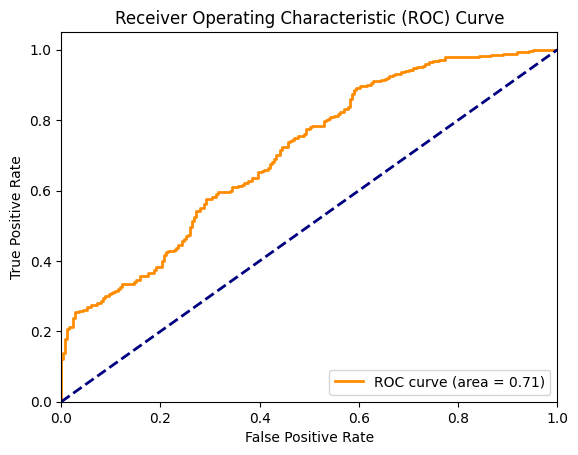

AUC: 0.7074353317656186


In [5]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = 'ic50_filtered_data.tsv'  # 적절한 경로로 변경 필요
data = pd.read_csv(file_path, sep='\t')

# True value와 predicted value 추출
true_values = data['Measurement value']
predicted_values = data['our_method_ic50']

# 이진 분류: IC50 값이 500 이하인 경우를 1, 초과하는 경우를 0으로 변환
threshold = 500
true_binary = (true_values >= threshold).astype(int)

# ROC curve 계산
fpr, tpr, thresholds = roc_curve(true_binary, predicted_values)
roc_auc = roc_auc_score(true_binary, predicted_values)

print(thresholds)


# ROC curve 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc}")


